In [1]:
import torch 
import torch.nn as nn
import torchvision
import torchvision.transforms as transforms
import numpy as np
import seaborn as sns

from network_classes import MNIST_net

import matplotlib.pyplot as plt

In [2]:
tensor_normalize = transforms.Compose([transforms.ToTensor(),
                                       transforms.Normalize(mean=[0.1307],std=[0.3081])])

MNIST_train = torchvision.datasets.MNIST(root='MNIST_data/',train=True,transform=tensor_normalize,download=False)
MNIST_test = torchvision.datasets.MNIST(root='MNIST_data/',train=False,transform=tensor_normalize,download=False)

batch_size = 32
dataloader = torch.utils.data.DataLoader(MNIST_train,
                                         batch_size=batch_size,
                                         shuffle=True)

dataloader_test = torch.utils.data.DataLoader(MNIST_test,
                                              batch_size=10000,
                                              shuffle=True)

In [3]:
# all_images = torch.zeros(len(dataloader),784)

# for i,(image,label) in enumerate(dataloader):
#     all_images[i] = image.flatten()

# print(torch.mean(all_images))
# print(torch.std(all_images))

Label = 0
torch.Size([32, 1, 28, 28])


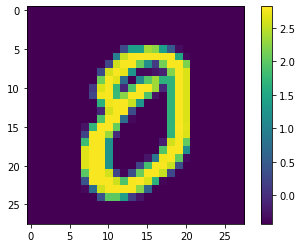

In [4]:
# Print example image

# inputs, classes = next(iter(dataloader))   
# plt.imshow(inputs[0,0,:,:])
for image, label in dataloader:
    plt.imshow(image[0,0])
    plt.colorbar()
    print(f'Label = {label[0]}')
    print(image.shape)
    break

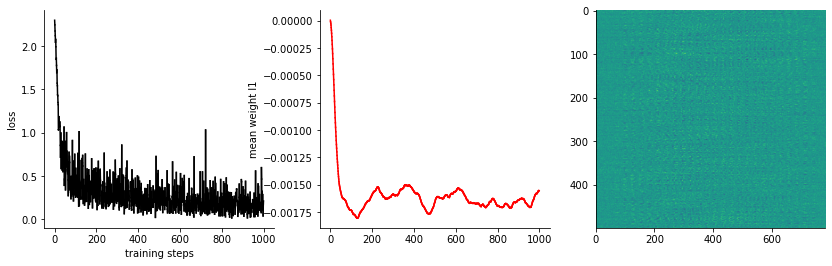

/Users/ag1880/Github_repos/Milstein-Lab/dentate_circuit_learning/notebooks/LossLandscape/network_classes.py:94: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  output = F.softmax(self.forward(images).detach())


Final accuracy = 94.70000457763672%


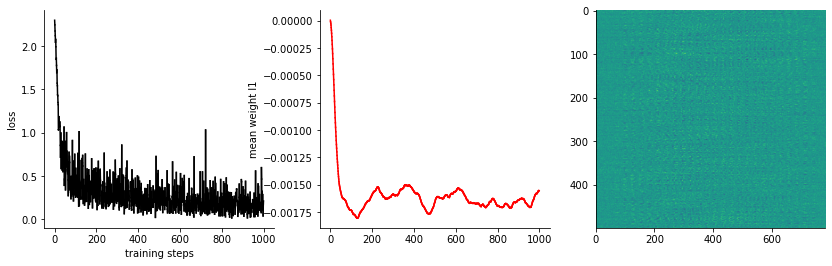

In [5]:
model = MNIST_net(batch_size)
model.train(dataloader,
            dataloader_test,
            num_epochs = 1,
            max_batch = 1000,
            lr = 0.0005,
            plot_dynamic_loss=True)

In [6]:
model.weight_history1.shape

torch.Size([1000, 500, 784])